In [13]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
x,N,p = sp.symbols('x N p', positive=True, real=True) 

In [31]:
def prod_ks(N):
    return N**.4

# løs x=f(N)
N_ks = sp.solve(prod_ks(N)-x,N)[0]
N_ks

x**(5/2)

In [32]:
Kostnad=5+3*N_ks
Kostnad

3*x**(5/2) + 5

In [33]:
# tilbudet gis av likning (3) p=GK
GK = sp.diff(Kostnad, x)
GK

15*x**(3/2)/2

In [34]:
AOB=sp.diff(GK,x)
AOB

45*sqrt(x)/4

In [36]:
# vi gjør klart for å plotte
Kostnad_fn=sp.lambdify(x, Kostnad)

GK_fn=sp.lambdify(x, GK)

display(Kostnad_fn(x))
display(GK_fn(x))

3*x**2.5 + 5

7.5*x**1.5

In [37]:
def AC(x):
    return Kostnad_fn(x)/x
# finn lavest x som gir positiv fortjeneste, dvs reservasjonsprisen

lavest_x=sp.solve(AC(x)-GK_fn(x),x)[0]
lavest_x

1.04304488151063

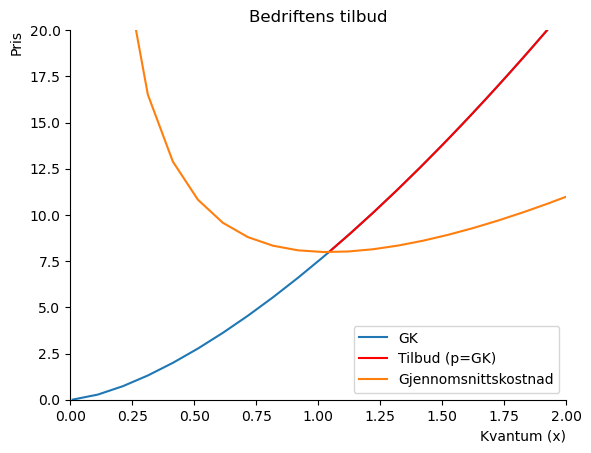

In [38]:
x_num=np.linspace(0.01,10,100)
x_1=np.linspace(float(lavest_x),10,100)
fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')


ax.set_title('Bedriftens tilbud')
ax.legend(loc='best');


In [39]:
K, w, r = sp.symbols("K w r", positive = True, real = True)

def prod_2(N, K):
    return N**(2/5) * K**(1/4)

prod_2(N, K)

K**0.25*N**0.4

In [40]:
N_solve = sp.solve(prod_2(N, K)-x, N) [0]

kostnad = K*r+w*N_solve

GK_2 = sp.diff(kostnad, x)
AOB_2 = sp.diff(N_solve, x)
kostnad_lamb_2 = sp.lambdify((x, w, r, K), kostnad)
GK_lamb_2 = sp.lambdify((x, w, r, K), GK_2)
display(kostnad)
display(GK_2)
display(AOB_2)

K*r + w*x**(5/2)/K**(5/8)

5*w*x**(3/2)/(2*K**(5/8))

5*x**(3/2)/(2*K**(5/8))

In [41]:
def AC_2(x, w, K, r):
    return kostnad_lamb_2(x, w, K, r) / x

lav_x = sp.solve(AC_2(x, w, r, K) - GK_lamb_2(x, w, r, K), x) [2] #Nr 2 pga imaginære tall
lav_x_lamb = sp.lambdify((w, r, K), lav_x)


display(lav_x)

0.850283000417194*K**(13/20)*r**(2/5)/w**(2/5)

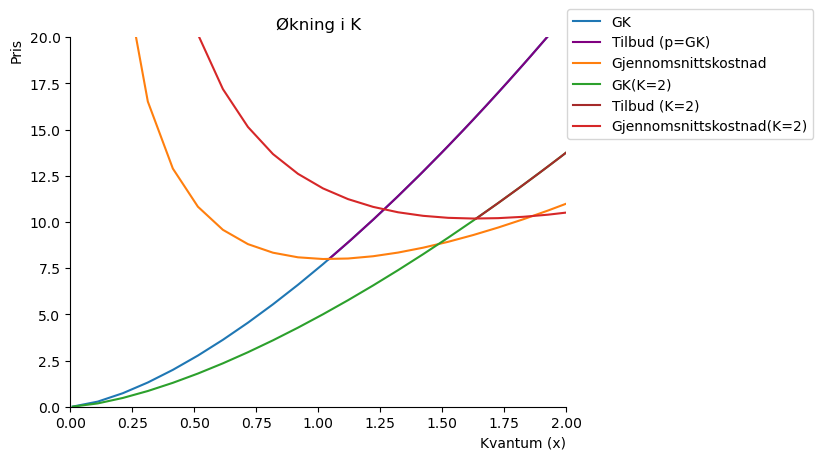

In [45]:
x_num=np.linspace(0.01,10,100)
x_1=np.linspace(float(lavest_x),10,100)
x_k = np.linspace(float(lav_x_lamb(3,5,2)),10,100)
x_r= np.linspace(float(lav_x_lamb(3,6,1)),10,100)
x_w= np.linspace(float(lav_x_lamb(4,5,1)),10,100)



fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


#Fra eksempel
ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='purple', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')



#GK_lamb
ax.plot(x_num, GK_lamb_2(x_num,3,2,2), label = 'GK(K=2)')
ax.plot(x_k, GK_lamb_2(x_k,3,2,2), color='brown', label = 'Tilbud (K=2)')
ax.plot(x_num, AC_2(x_num,3,5,2), label = 'Gjennomsnittskostnad(K=2)')

ax.set_title('Økning i K')
ax.legend(loc='center', bbox_to_anchor=(1.25, 0.9));


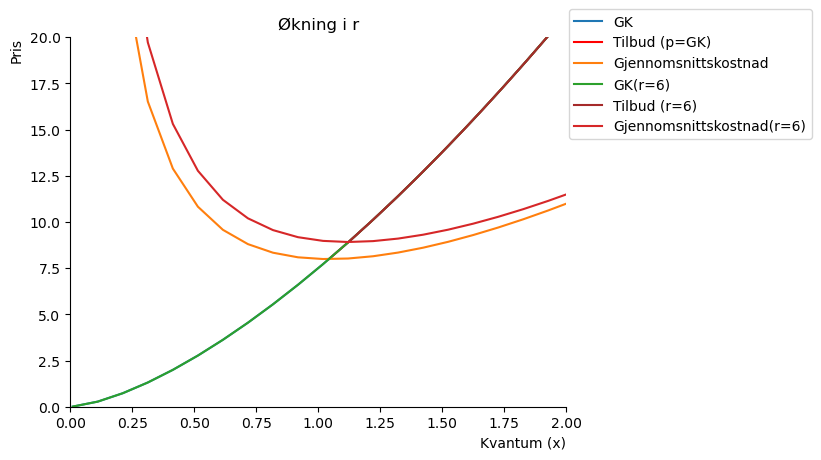

In [48]:
fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


#Fra eksempel
ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')




ax.plot(x_num, GK_lamb_2(x_num,3,6,1), label = 'GK(r=6)')
ax.plot(x_r, GK_lamb_2(x_r,3,6,1), color='brown', label = 'Tilbud (r=6)')
ax.plot(x_num, AC_2(x_num,3,6,1), label = 'Gjennomsnittskostnad(r=6)')



ax.set_title('Økning i r')
ax.legend(loc='center', bbox_to_anchor=(1.25, 0.9));


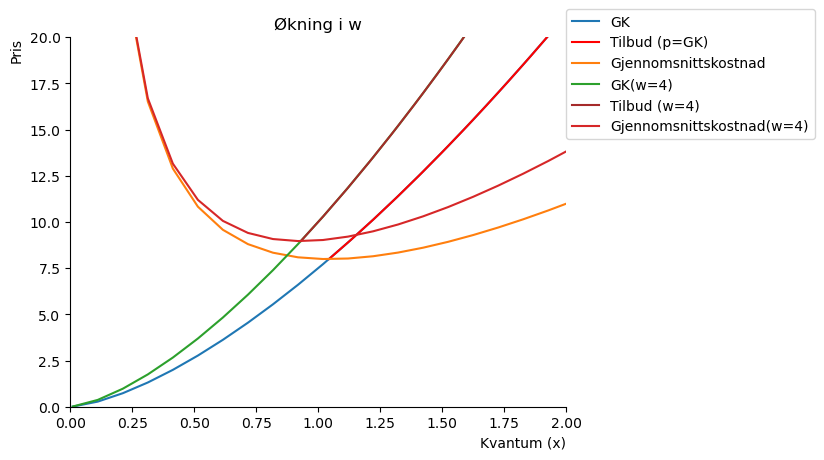

In [47]:
fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


#Fra eksempel
ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')




ax.plot(x_num, GK_lamb_2(x_num,4,5,1), label = 'GK(w=4)')
ax.plot(x_w, GK_lamb_2(x_w,4,6,1), color='brown', label = 'Tilbud (w=4)')
ax.plot(x_num, AC_2(x_num,4,5,1), label = 'Gjennomsnittskostnad(w=4)')

ax.set_title('Bedriftens tilbud -økning i w')


ax.set_title('Økning i w')
ax.legend(loc='center', bbox_to_anchor=(1.25, 0.9));
